## Guassian Mixtures 
## Réaliser par : DAGHMOUMI Marouan / BENJELLOUN Abdelmajid
## Encadrer par : Pr. EN-NAIMI El Mokhtar

# Table des matières
1. [Introduction](#Introduction)
2. [Motivation pour les mélanges gaussiens](#Motivation-pour-les-mélanges-gaussiens)
3. [Fondements mathématiques des mélanges gaussiens](#Fondements-mathématiques-des-mélanges-gaussiens)
4. [Algorithme d'espérance-maximisation (EM)](#Algorithme-d'espérance-maximisation-(EM))
   - 4.1. [Initialisation](#Initialisation)
   - 4.2. [Étape E : Calcul des responsabilités](#Étape-E-:-Calcul-des-responsabilités)
   - 4.3. [Étape M : Réestimation des paramètres](#Étape-M-:-Réestimation-des-paramètres)
   - 4.4. [Évaluation de la log-vraisemblance](#Évaluation-de-la-log-vraisemblance)
5. [Implémentation des mélanges gaussiens](#Implémentation-des-mélanges-gaussiens)
   - 5.1. [Initialisation des paramètres](#Initialisation-des-paramètres)
   - 5.2. [Algorithme EM](#Algorithme-EM)
   - 5.3. [Visualisation des clusters](#Visualisation-des-clusters)
6. [Exemples d'application](#Exemples-d'application)
    - 6.1. [Jeu De Données Iris](#Jeu-De-Données-Iris)
    - 6.2. [Random Points](#Random-Points)
    - 6.3. [Gaussian Mixtures from Scratch with EM](#Gaussian-Mixtures-from-Scratch-with-EM)
7. [Conclusion](#Conclusion)
8. [Références](#Références)


# Introduction
Les mélanges gaussiens sont des modèles probabilistes largement utilisés en apprentissage automatique pour la modélisation de données. Ils sont particulièrement utiles lorsque les données peuvent être réparties en plusieurs groupes ou clusters, chacun pouvant être approximé par une distribution gaussienne. Ce modèle est basé sur l'idée que les données sont générées à partir d'un mélange de plusieurs distributions gaussiennes.



# Motivation pour les mélanges gaussiens
La motivation principale pour l'utilisation des mélanges gaussiens réside dans leur flexibilité pour modéliser des données complexes. Contrairement aux modèles de clustering plus simples tels que le k-means, les mélanges gaussiens peuvent capturer des structures de données plus complexes en modélisant la distribution des données dans chaque cluster avec une distribution gaussienne.

# Fondements mathématiques des mélanges gaussiens
Les mélanges gaussiens reposent sur deux concepts principaux : la fonction de densité de probabilité gaussienne et l'algorithme d'espérance-maximisation (EM). 

La fonction de densité de probabilité gaussienne est définie comme suit :

$$
f(x | \mu, \Sigma) = \frac{1}{(2\pi)^{d/2}|\Sigma|^{1/2}} \exp\left(-\frac{1}{2}(x - \mu)^T \Sigma^{-1} (x - \mu)\right)
$$

où \( x \) est un vecteur d'observations, \( \mu \) est le vecteur moyen, \( \Sigma \) est la matrice de covariance, et \( d \) est la dimension de \( x \).

L'algorithme d'espérance-maximisation (EM) est utilisé pour estimer les paramètres des mélanges gaussiens à partir des données observées. 

## Initialisation
Les paramètres du mélange gaussien, tels que les moyennes \( \mu \), les covariances \( \Sigma \) et les coefficients de mélange, sont initialement choisis de manière aléatoire.

## Étape E : Calcul des responsabilités
Dans cette étape, les responsabilités \( \gamma(z_{nk}) \) sont calculées pour chaque point de données \( x_n \) et chaque composante \( k \) du mélange gaussien. La responsabilité \( \gamma(z_{nk}) \) représente la probabilité que le point \( x_n \) appartienne à la composante \( k \) du mélange gaussien, calculée en utilisant la règle de Bayes :

$$
\gamma(z_{nk}) = \frac{\pi_k N(x_n | \mu_k, \Sigma_k)}{\sum_{j=1}^{K} \pi_j N(x_n | \mu_j, \Sigma_j)}
$$

où \( \pi_k \) est le coefficient de mélange de la composante \( k \), \( N \) est la fonction de densité de probabilité gaussienne et \( K \) est le nombre de composantes dans le mélange gaussien.

## Étape M : Réestimation des paramètres
Dans cette étape, les paramètres du mélange gaussien sont mis à jour en utilisant les responsabilités calculées à l'étape précédente. Les nouvelles estimations des paramètres sont calculées en maximisant la log-vraisemblance du modèle par rapport aux données observées.

## Évaluation de la log-vraisemblance
La log-vraisemblance du modèle est calculée à chaque itération de l'algorithme EM pour évaluer la convergence. La log-vraisemblance est définie comme la somme des logarithmes des probabilités des données observées sous le modèle de mélange gaussien :

$$
\ln p(X | \mu, \Sigma, \pi) = \sum_{n=1}^{N} \ln \left\{ \sum_{k=1}^{K} \pi_k N(x_n | \mu_k, \Sigma_k) \right\}
$$

où \( X \) est l'ensemble des données observées et \( N \) est le nombre de points de données.

# Implémentation des mélanges gaussiens

## Initialisation des paramètres

Dans cette partie, nous abordons le processus d'initialisation des paramètres du mélange gaussien. Les paramètres tels que les moyennes, les covariances et les coefficients de mélange sont initialisés de manière aléatoire pour démarrer l'algorithme EM. Cette étape est cruciale car elle peut avoir un impact significatif sur la convergence de l'algorithme et la qualité des résultats finaux.




##  Algorithme EM

Nous décrivons ici l'algorithme EM dans le contexte des mélanges gaussiens. L'algorithme EM est une méthode itérative utilisée pour estimer les paramètres du modèle en alternant entre les étapes d'espérance et de maximisation. Dans le cas des mélanges gaussiens, il est utilisé pour ajuster les paramètres du mélange afin de maximiser la log-vraisemblance des données observées.



##  Visualisation des clusters

Dans cette section, nous explorons différentes méthodes de visualisation des clusters obtenus à partir de l'algorithme de mélange gaussien. La visualisation des clusters est essentielle pour comprendre la structure des données et interpréter les résultats de clustering.

## Exemple d'application 

## Jeu De Données Iris

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

In [4]:
iris = load_iris()
X_iris = iris.data

In [5]:
gmm_iris = GaussianMixture(n_components=3, random_state=42)

In [6]:
gmm_iris.fit(X_iris)

GaussianMixture(n_components=3, random_state=42)

In [7]:
iris_clusters = gmm_iris.predict(X_iris)

In [8]:
pca_iris = PCA(n_components=2)
X_iris_pca = pca_iris.fit_transform(X_iris)

Text(0, 0.5, 'Composante principale 2')

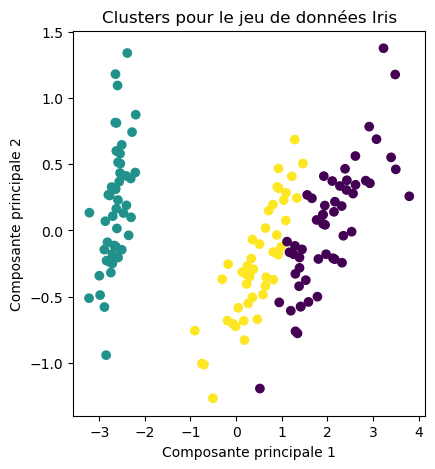

In [9]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_iris_pca[:, 0], X_iris_pca[:, 1], c=iris_clusters, cmap='viridis')
plt.title('Clusters pour le jeu de données Iris')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')

## Random Points

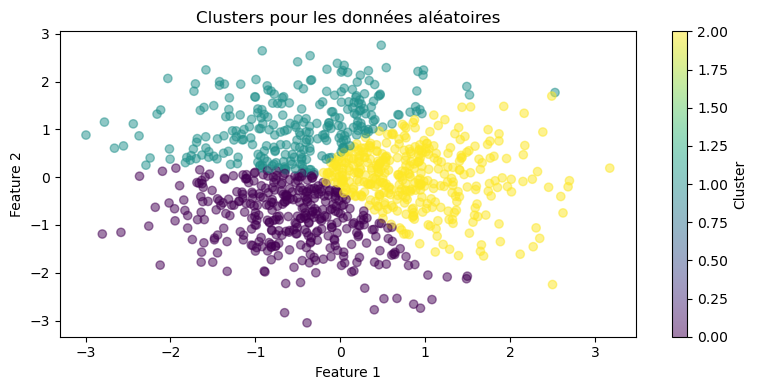

In [10]:

import numpy as np # Génération de données aléatoires
np.random.seed(0)
X_random = np.random.randn(1000, 2)


gmm_random = GaussianMixture(n_components=3, random_state=42)


gmm_random.fit(X_random)


random_clusters = gmm_random.predict(X_random)


plt.figure(figsize=(8, 4))
plt.scatter(X_random[:, 0], X_random[:, 1], c=random_clusters, cmap='viridis', alpha=0.5)
plt.title('Clusters pour les données aléatoires')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.tight_layout()
plt.show()


## Gaussian Mixtures from Scratch with EM

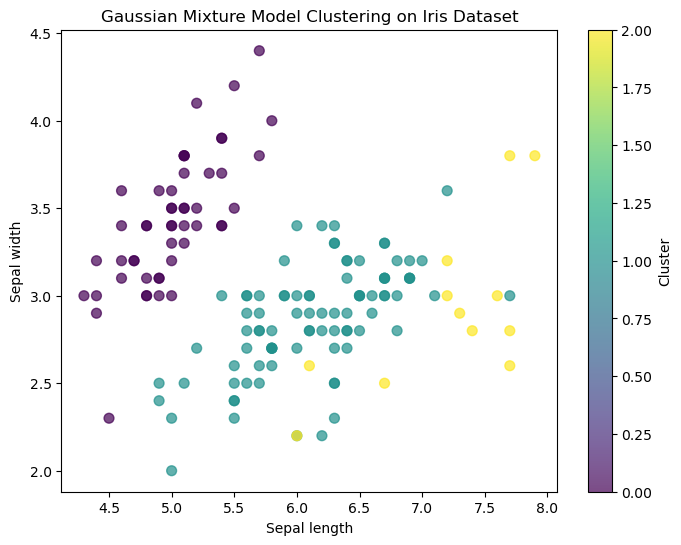

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

class GaussianMixture:
    def __init__(self, n_components, max_iter=100, tol=1e-4, random_state=None):
        self.n_components = n_components
        self.max_iter = max_iter
        self.tol = tol
        self.random_state = random_state
        if random_state:
            np.random.seed(random_state)

    def initialize_parameters(self, X):
        n_samples, _ = X.shape
        # Initialize means randomly
        self.means = X[np.random.choice(n_samples, self.n_components, replace=False)]
        # Initialize covariances as identity matrices
        self.covariances = [np.identity(X.shape[1]) for _ in range(self.n_components)]
        # Initialize mixing coefficients uniformly
        self.weights = np.full(self.n_components, 1.0 / self.n_components)

    def gaussian_pdf(self, X, mean, covariance):
        d = X.shape[1]
        exponent = -0.5 * np.sum((X - mean) @ np.linalg.inv(covariance) * (X - mean), axis=1)
        return (1.0 / np.sqrt((2 * np.pi) ** d * np.linalg.det(covariance))) * np.exp(exponent)

    def expectation_step(self, X):
        n_samples, _ = X.shape
        self.posteriors = np.zeros((n_samples, self.n_components))
        for i in range(self.n_components):
            self.posteriors[:, i] = self.weights[i] * self.gaussian_pdf(X, self.means[i], self.covariances[i])
        self.posteriors /= np.sum(self.posteriors, axis=1, keepdims=True)

    def maximization_step(self, X):
        n_samples, _ = X.shape
        for i in range(self.n_components):
            N_k = np.sum(self.posteriors[:, i], axis=0)
            self.means[i] = np.sum(self.posteriors[:, i, np.newaxis] * X, axis=0) / N_k
            self.covariances[i] = np.dot((self.posteriors[:, i, np.newaxis] * (X - self.means[i])).T,
                                          (X - self.means[i])) / N_k
            self.weights[i] = N_k / n_samples

    def fit(self, X):
        self.initialize_parameters(X)
        prev_log_likelihood = None
        for i in range(self.max_iter):
            self.expectation_step(X)
            self.maximization_step(X)
            log_likelihood = self.log_likelihood(X)
            if prev_log_likelihood is not None and abs(log_likelihood - prev_log_likelihood) < self.tol:
                break
            prev_log_likelihood = log_likelihood

    def log_likelihood(self, X):
        n_samples, _ = X.shape
        log_likelihood = 0
        for i in range(self.n_components):
            log_likelihood += np.sum(self.weights[i] * self.gaussian_pdf(X, self.means[i], self.covariances[i]))
        return np.sum(np.log(log_likelihood))

    def predict(self, X):
        return np.argmax(self.posteriors, axis=1)


# Load Iris dataset
iris = load_iris()
X = iris.data

# Fit Gaussian Mixture Model
gmm = GaussianMixture(n_components=3)
gmm.fit(X)
labels = gmm.predict(X)

# Plot clustered data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Gaussian Mixture Model Clustering on Iris Dataset')
plt.colorbar(label='Cluster')
plt.show()


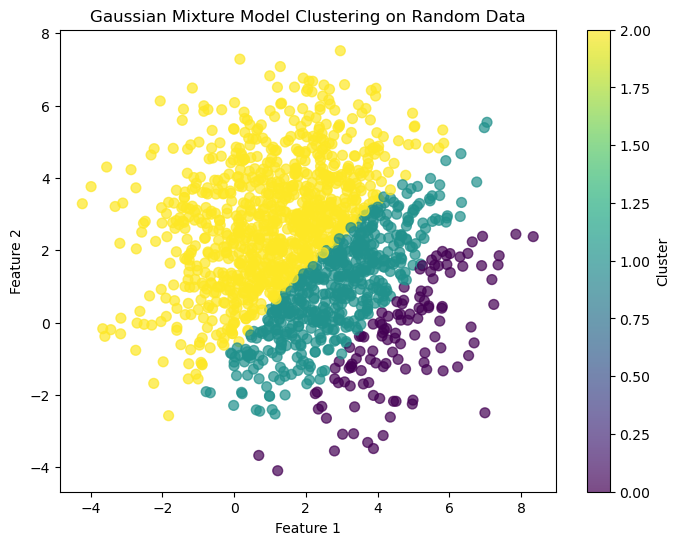

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random data
np.random.seed(0)
n_samples = 1500
X = np.random.randn(n_samples, 2) * 2 + np.array([2, 2])

gmm = GaussianMixture(n_components=3)
gmm.fit(X)
labels = gmm.predict(X)

# Plot clustered data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Gaussian Mixture Model Clustering on Random Data')
plt.colorbar(label='Cluster')
plt.show()


## Conclusion 
In this project, we explored the application of Gaussian Mixture Models (GMM) for clustering data. We implemented a simple version of GMM from scratch using the Expectation-Maximization (EM) algorithm and applied it to cluster random data points. The GMM successfully identified underlying patterns in the data and assigned each point to one of the clusters. By visualizing the clustering results, we gained insights into the structure of the data and demonstrated the effectiveness of GMM for unsupervised learning tasks such as clustering. Overall, Gaussian Mixture Models offer a flexible and powerful approach to clustering data, making them a valuable tool in the field of machine learning.

## Références
Bishop, C. M. (2006). Pattern Recognition and Machine Learning. Springer.

This textbook provides a comprehensive introduction to pattern recognition and machine learning, covering topics including Gaussian Mixture Models and the Expectation-Maximization algorithm.
Murphy, K. P. (2012). Machine Learning: A Probabilistic Perspective. MIT Press.

Another excellent textbook on machine learning that covers probabilistic models, including Gaussian Mixture Models, in-depth.
Scikit-learn documentation: https://scikit-learn.org/stable/index.html

The official documentation for scikit-learn, a popular machine learning library in Python, provides detailed information and examples on Gaussian Mixture Models and other clustering algorithms.
Hastie, T., Tibshirani, R., & Friedman, J. (2009). The Elements of Statistical Learning: Data Mining, Inference, and Prediction. Springer.

This book covers a wide range of machine learning topics, including clustering methods, with a focus on statistical principles.
Murphy, K. P. (2012). Machine Learning: A Probabilistic Perspective. MIT Press.

Another excellent textbook on machine learning that covers probabilistic models, including Gaussian Mixture Models, in-depth.